In [1]:
import pandas as pd
import math 
import numpy as np
from sklearn import preprocessing, model_selection, svm 
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv('GOOGL.csv',
                  header=0, 
                  index_col='Date',
                  parse_dates=True)
df = df[['Open','High','Low','Close','Volume',]]
df['HL_PCT'] = (df['High']-df['Close'])/df['Close'] * 100
df['PCT_change'] = (df['Close']-df['Open'])/df['Open'] * 100
df = df[['Close','HL_PCT','PCT_change','Volume']]
forecast_col = 'Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [3]:
df.head()

,Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2009-05-22,196.946945,1.308767,-0.796656,3433700,212.872879
2009-05-26,202.382385,0.158271,3.166221,6202700,212.282288
2009-05-27,202.982986,1.553408,-0.019722,6062500,211.006012
2009-05-28,205.405411,0.297271,0.420872,5332200,209.704712
2009-05-29,208.823822,0.000000,1.242386,5291100,204.449448


In [4]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

In [6]:
import pickle

In [7]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [8]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [9]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1183.34029389 1153.2700322  1148.38222875 1137.66588197 1144.93215696
 1145.91762719 1160.58395901 1137.89082974 1158.15574197 1171.1987422
 1182.12776369 1182.46867751 1190.23312364 1217.71526667 1219.48917525
 1212.94353175 1232.53536239 1228.95682759 1216.51326117 1214.64892964
 1224.87489283 1268.33667194 1291.81693399 1300.05994419] 0.9800126616225509 24


In [10]:
style.use('ggplot')

In [11]:
df['Forecast'] = np.nan

In [12]:
last_date = df.iloc[-1].name

In [13]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [14]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [15]:
df.tail()

,Close,HL_PCT,PCT_change,Volume,label,Forecast
Date,,,,,,
2018-08-15 08:00:00,NaN,NaN,NaN,NaN,NaN,1214.648930
2018-08-16 08:00:00,NaN,NaN,NaN,NaN,NaN,1224.874893
2018-08-17 08:00:00,NaN,NaN,NaN,NaN,NaN,1268.336672
2018-08-18 08:00:00,NaN,NaN,NaN,NaN,NaN,1291.816934
2018-08-19 08:00:00,NaN,NaN,NaN,NaN,NaN,1300.059944


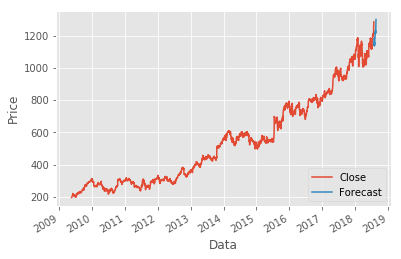

In [16]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()